# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

In this scenario, machine learning is an appropriate solution because it can analyze historical flight data to identify patterns and predict delays based on various features like weather, flight times, and airport traffic. The goal is to provide customers with an early warning about potential delays, improving their overall travel experience. The business metric for success could be the accuracy of the delay predictions, measured by metrics like precision, recall, and F1 score. The machine learning problem statement is to develop a model that predicts whether a flight will be delayed based on historical data. This represents a classification problem.


### 2. Formulate the business problem, success metrics, and desired ML output.

Business Problem: Improve customer experience by predicting flight delays due to weather and informing customers at the time of booking.
Success Metrics: Accuracy of the delay prediction model, measured using precision, recall, and F1 score.
Desired ML Output: A classification model that predicts whether a flight will be delayed based on historical flight dat.


### 3. Identify the type of ML problem you’re dealing with.

This is a supervised classification problem where the target variable is whether a flight is delayed or not (binary classification).


### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [65]:
# Import necessary libraries
import os
from pathlib import Path
from zipfile import ZipFile
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
sns.set()
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [66]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'Software'
base_path = 'Software'
csv_base_path = 'Extracted_Dataset'

!mkdir {csv_base_path}

In [67]:
# Specify the directory where the zip files are located
zip_directory = 'Dataset'
# Get a list of all files in the directory
all_files = os.listdir(zip_directory)
# Filter out the files that have a .zip extension
csv_files = [file for file in all_files if file.endswith('.csv')]
# Print the number of zip files
print(f'Total number of files in zip: {len(csv_files)}')

Total number of files in zip: 60


#### Extract CSV files from ZIP files

In [68]:
# Create directory for CSV files if it doesn't exist
os.makedirs(csv_base_path, exist_ok=True)
# Function to extract CSV files from ZIP files
def zip2csv(zipFile_name, file_path):
    try:
        with ZipFile(zipFile_name, 'r') as z:
            print(f'Extracting {zipFile_name}')
            z.extractall(path=file_path)
    except:
        print(f'zip2csv failed for {zipFile_name}')
# Example usage (you need to loop through your files list)
zip2csv('Dataset.zip', csv_base_path)
print("Extraction Completed")

Extracting Dataset.zip
Extraction Completed


In [69]:
# List all files in the current directory
directory = "Extracted_Dataset"
files_in_directory = os.listdir(directory)
# Filter files with a .csv extension
csv_files = [file for file in files_in_directory if file.endswith('.csv')]
# Count the number of CSV files
num_csv_files = len(csv_files)
print(f"Number of CSV files extracted: {num_csv_files}")

Number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [129]:
from IPython.display import IFrame
IFrame(src=os.path.relpath("Dataset/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [71]:
# Load a sample CSV to explore
df_temp = pd.read_csv('Extracted_Dataset/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

**Question**: Print the row and column length in the dataset, and print the column names.

In [72]:
# Print the shape (rows, columns)
rows, columns = df_temp.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
# Print the column names
column_names = df_temp.columns.tolist()
print("Column names:", column_names)

Number of rows: 585749
Number of columns: 110
Column names: ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'Security

**Question**: Print the first 10 rows of the dataset.  

In [73]:
# Display the first 10 rows
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset.

In [74]:
# Print all the columns in the dataset
print('The column names are:')
for col in df_temp.columns:
    print(col)

The column names are:
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1TotalGTime


**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [75]:
# Print columns that contain the word 'Del'
delay_columns = [col for col in df_temp.columns if 'Del' in col]
print('Columns with "Del" in their name:')
delay_columns

Columns with "Del" in their name:


['DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'DivArrDelay']

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [76]:
# Number of rows and columns
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])
# Years in the dataset
print("The years in this dataset are: ", df_temp['Year'].unique())
# Months covered in the dataset
print("The months covered in this dataset are: ", df_temp['Month'].unique())
# Date range for data
print("The date range for data is :", min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))
# Airlines covered
print("The airlines covered in this dataset are: ", df_temp['Reporting_Airline'].unique())
# Origin and Destination airports covered
print("The Origin airports covered are: ", df_temp['Origin'].unique())
print("The Destination airports covered are: ", df_temp['Dest'].unique())

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E' 'B6' 'WN' 'YV' 'YX' 'EV' 'AA' 'AS' 'DL' 'HA' 'UA' 'F9' 'G4' 'MQ'
 'NK' 'OH' 'OO']
The Origin airports covered are:  ['DFW' 'LGA' 'MSN' 'MSP' 'ATL' 'BDL' 'VLD' 'JFK' 'RDU' 'CHS' 'DTW' 'GRB'
 'PVD' 'SHV' 'FNT' 'PIT' 'RIC' 'RST' 'RSW' 'CVG' 'LIT' 'ORD' 'JAX' 'TRI'
 'BOS' 'CWA' 'DCA' 'CHO' 'AVP' 'IND' 'GRR' 'BTR' 'MEM' 'TUL' 'CLE' 'STL'
 'BTV' 'OMA' 'MGM' 'TVC' 'SAV' 'GSP' 'EWR' 'OAJ' 'BNA' 'MCI' 'TLH' 'ROC'
 'LEX' 'PWM' 'BUF' 'AGS' 'CLT' 'GSO' 'BWI' 'SAT' 'PHL' 'TYS' 'ACK' 'DSM'
 'GNV' 'AVL' 'BGR' 'MHT' 'ILM' 'MOT' 'IAH' 'SBN' 'SYR' 'ORF' 'MKE' 'XNA'
 'MSY' 'PBI' 'ABE' 'HPN' 'EVV' 'ALB' 'LNK' 'AUS' 'PHF' 'CHA' 'GTR' 'BMI'
 'BQK' 'CID' 'CAK' 'ATW' 'ABY' 'CAE' 'SRQ' 'MLI' 'BHM' 'IAD' 'CSG' 'CMH'
 'MCO' 'MBS' 'FLL' 'SDF' 'TPA' 'MVY' 'LAS' 'LGB' 'SFO' 'SAN' 'LAX'

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [77]:
# Count of all origin and destination airports
counts = pd.DataFrame({'Origin': df_temp['Origin'].value_counts(), 'Destination': df_temp['Dest'].value_counts()})
print(counts)

     Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [78]:
# Top 15 origin and destination airports
print(counts.sort_values(by='Origin', ascending=False).head(15))

     Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [79]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """ Combine csv files into one DataFrame """
    # Create an empty dataframe
    combined_df = pd.DataFrame()
    
    for file in csv_files:
        # Read CSV file into a dataframe
        df = pd.read_csv(file)
        
        # Filter the columns based on filter_cols
        df_filter = df[filter_cols]
        
        # Subset the rows based on subset_vals in subset_cols
        for col, vals in zip(subset_cols, subset_vals):
            df_filter = df_filter[df_filter[col].isin(vals)]
        
        # Concatenate the dataframe with the empty dataframe
        combined_df = pd.concat([combined_df, df_filter], ignore_index=True)
    
    # Save the combined dataframe to a CSV file
    combined_df.to_csv(file_name, index=False)
    return combined_df

In [80]:
# List of CSV files to combine
csv_files = [f'{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_{i}.csv' for i in range(1, 12)]
csv_files = [f'{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2015_{i}.csv' for i in range(1, 12)]
csv_files = [f'{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_{i}.csv' for i in range(1, 12)]
csv_files = [f'{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_{i}.csv' for i in range(1, 12)]
csv_files = [f'{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_{i}.csv' for i in range(1, 12)]

# Call the combine_csv function
cols = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime']
subset_cols = ['Origin', 'Dest', 'Reporting_Airline']
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], ['UA', 'OO', 'WN', 'AA', 'DL']]

combined_csv_filename = f"/combined_files.csv"

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [81]:
start = time.time()
combined_data = combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)
print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 3.06 minutes


#### Load dataset

Load the combined dataset.

In [82]:
# Load the combined dataset
data = pd.read_csv(combined_csv_filename)

Print the first 5 records.

In [83]:
# Print the first 5 records
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2018,1,1,27,6,2018-01-27,UA,LAX,CA,ORD,IL,650,0.0,0.0,1744.0,7,-8.0,0.0,0.0,212.0
1,2018,1,1,27,6,2018-01-27,UA,IAH,TX,PHX,AZ,1420,0.0,0.0,1009.0,5,-19.0,0.0,0.0,142.0
2,2018,1,1,27,6,2018-01-27,UA,DEN,CO,ORD,IL,950,0.0,0.0,888.0,4,-31.0,0.0,0.0,110.0
3,2018,1,1,27,6,2018-01-27,UA,IAH,TX,ATL,GA,735,0.0,0.0,689.0,3,-12.0,0.0,0.0,95.0
4,2018,1,1,27,6,2018-01-27,UA,LAX,CA,DEN,CO,1330,0.0,0.0,862.0,4,-17.0,0.0,0.0,116.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [84]:
# Answer the exploratory questions
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :", min(data['FlightDate']), " to ", max(data['FlightDate']))
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  314504  and  20
The years in this dataset are:  [2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
The date range for data is : 2018-01-01  to  2018-11-30
The airlines covered in this dataset are:  ['UA', 'OO', 'WN', 'AA', 'DL']
The Origin airports covered are:  ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']
The Destination airports covered are:  ['ORD', 'PHX', 'ATL', 'DEN', 'SFO', 'DFW', 'IAH', 'LAX', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [85]:
# Rename the column from ArrDel15 to is_delay
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [86]:
# Look for nulls across columns
print(data.isnull().sum(axis=0))

Year                    0
Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
FlightDate              0
Reporting_Airline       0
Origin                  0
OriginState             0
Dest                    0
DestState               0
CRSDepTime              0
Cancelled               0
Diverted                0
Distance                0
DistanceGroup           0
ArrDelay             3584
ArrDelayMinutes      3584
is_delay             3584
AirTime              3584
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [87]:
# Remove null rows
data = data.dropna()

Get the hour of the day in 24-hour time format from CRSDepTime.

In [88]:
# Get the hour of the day in 24-hour time format from CRSDepTime
data['DepHourofDay'] = data['CRSDepTime'] // 100

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

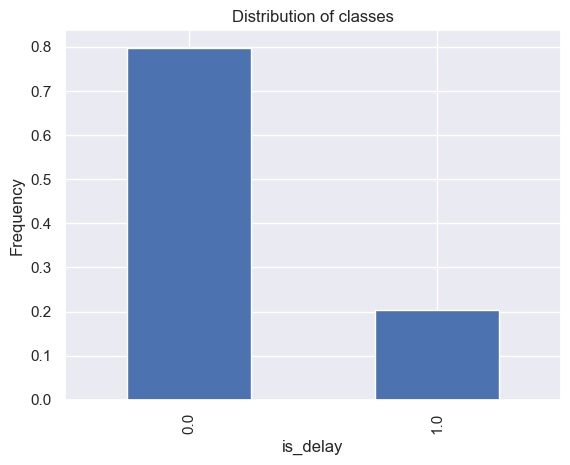

In [89]:
# Check class delay vs. no delay
(data.groupby('is_delay').size() / len(data)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot shows that most flights are not delayed, with a smaller proportion experiencing delays. This skewed ratio suggests that delays are less common events, which is important for modeling as it can impact the balance of the classes in the dataset.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

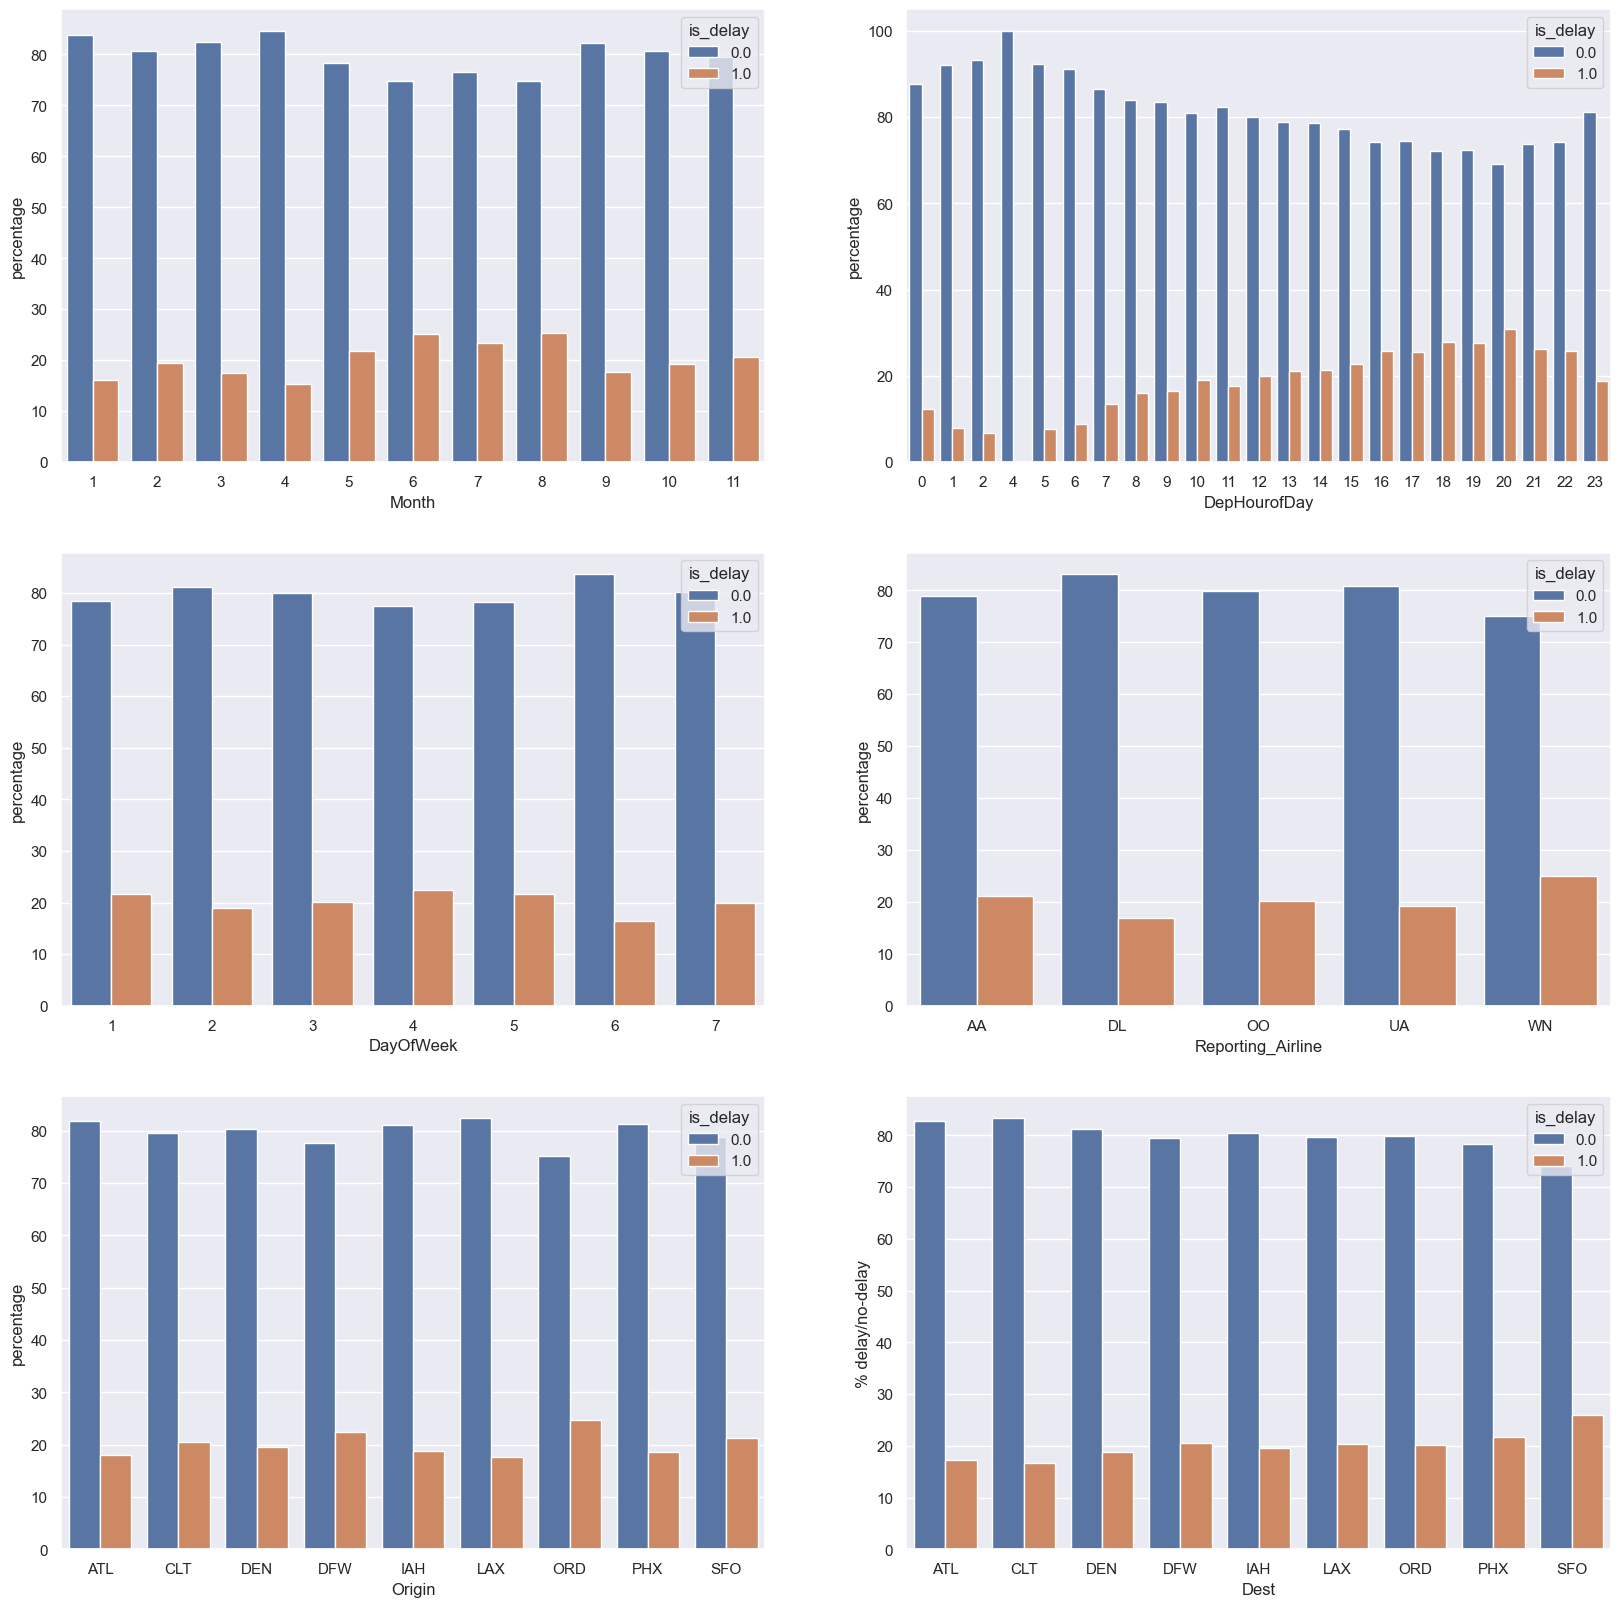

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20, 20), squeeze=False)
for idx, column in enumerate(viz_columns):
    ax = axes[idx // 2, idx % 2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
plt.show()

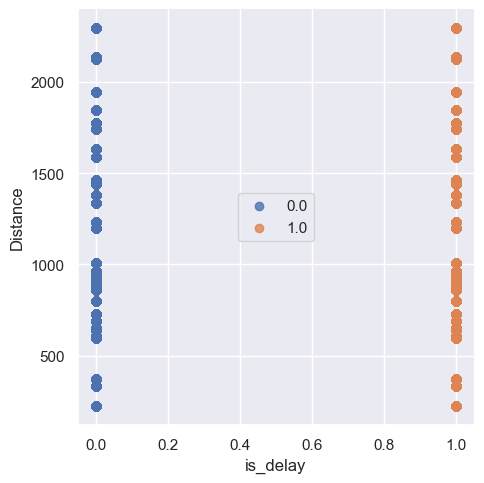

In [91]:
sns.lmplot(x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

December and January tend to have the most delays, likely due to winter weather and the holiday travel season.
Late afternoon and evening hours, particularly from 3 PM to 9 PM, show higher delay rates.
Fridays generally have the most delays, possibly due to increased travel at the end of the workweek.
The analysis points to specific airlines, like WN (Southwest Airlines), having higher delay rates compared to others.
Major hubs like ATL (Hartsfield-Jackson Atlanta International Airport) and ORD (Chicago O'Hare International Airport) frequently experience higher delays.
The visualizations suggest that longer-distance flights tend to have a higher probability of delays.

### Features

Look at all the columns and what their specific types are.

In [92]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [93]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [94]:
# Filtering required columns
data_orig = data.copy()
data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay']]
categorical_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [95]:
# One-hot encoding
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis=1)
data.drop(categorical_columns, axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [96]:
# Check the length and the new columns
print(data.shape)

(310920, 93)


In [97]:
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'DayofMonth_2',
       'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6',
       'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10',
       'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14',
       'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18',
       'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22',
       'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26',
       'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30',
       'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL',
       'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN',
       'Origin_CLT', 'Origin_DEN', 'Origin_DFW

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [98]:
data.rename(columns={'is_delay': 'target'}, inplace=True)
# Save the combined CSV file to your local computer (this is just a placeholder path)

In [99]:
data.to_csv('combined_csv_v1.csv', index=False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [100]:
# Split the data into train, validate, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

### Baseline classification model

In [101]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression model
clf = LogisticRegression()
clf.fit(train_data.drop('target', axis=1), train_data['target'])
# Predict on test data
y_pred = clf.predict(test_data.drop('target', axis=1))

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [102]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
# Evaluate model
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [103]:
def plot_roc(test_labels, target_predicted_proba):
    fpr, tpr, _ = roc_curve(test_labels, target_predicted_proba)
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(test_labels, target_predicted_proba))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

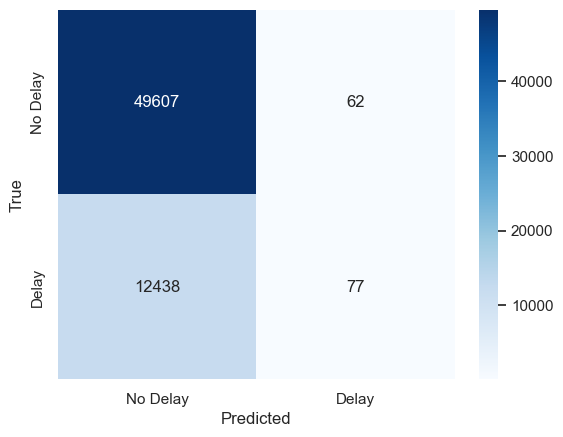

In [104]:
# Plot confusion matrix
plot_confusion_matrix(test_data['target'], y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

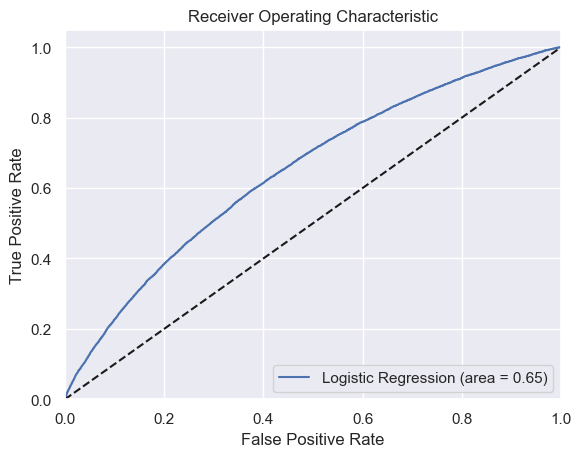

In [105]:
# Plot ROC curve
y_pred_proba = clf.predict_proba(test_data.drop('target', axis=1))[:, 1]
plot_roc(test_data['target'], y_pred_proba)

In [106]:
# Print statistics
print(f'Accuracy: {accuracy_score(test_data['target'], y_pred)}')
print(f'Precision: {precision_score(test_data['target'], y_pred)}')
print(f'Recall: {recall_score(test_data['target'], y_pred)}')

Accuracy: 0.798983661391998
Precision: 0.5539568345323741
Recall: 0.006152616859768278


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


The confusion matrix helps us understand the number of true positives, true negatives, false positives, and false negatives. A high number of true positives and true negatives suggests that the model is performing well, while a high number of false positives or false negatives indicates areas where the model could improve.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [107]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [108]:
# Adding a new feature: 'is_holiday'
holidays = ['2014-01-01', '2014-07-04', '2015-12-25', '2016-01-01', '2017-11-23', '2018-12-25']
# Adding indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [109]:
# Import weather data
weather = pd.read_csv('daily-summaries-2024-10-26T02-27-40.csv')
# Map weather stations to airport codes
station = ['USW00023174','USW00012960','USW00003017','USW00094846', 'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881']
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [110]:
# Create a MONTH column from the DATE column
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [111]:
# Handle missing values in SNOW and SNWD
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [112]:
# Create an array of indices
idx = np.array([i for i in range(len(weather))])
# Get indices of rows with missing values for TAVG, TMAX, and TMIN
TAVG_idx = weather[weather['TAVG'].isna()].index.to_numpy()
TMAX_idx = weather[weather['TMAX'].isna()].index.to_numpy()
TMIN_idx = weather[weather['TMIN'].isna()].index.to_numpy()
# Print the indices
print("Indices with missing TAVG:", TAVG_idx)
print("Indices with missing TMAX:", TMAX_idx)
print("Indices with missing TMIN:", TMIN_idx)

Indices with missing TAVG: [ 3956  3957  3958  3959  3960  3961  3962  3963  3964  3965  3966  3967
  3968  3969  3970  3971  3972  3973  3974  3975  3976  3977  3978  3979
  3980  3981  3982  3983  3984  3985  4017  4018  4019  4020  4021  4022
  4023  4024  4025  4026  4027  4028  4029  4030  4031  4032  4033  4034
  4035  4036  4037  4038  4039  4040  4041  4042  4043  4044  4045  4046
  4047 13420]
Indices with missing TMAX: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]
Indices with missing TMIN: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]


You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [113]:
# Replace missing TAVG, TMAX, TMIN with mean values
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean', 'TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather = pd.merge(weather, weather_impute, how='left', left_on=['MONTH','STATION'], right_on=['MONTH','STATION']).rename(columns={'TAVG_y':'TAVG_AVG', 'TMAX_y':'TMAX_AVG', 'TMIN_y':'TMIN_AVG', 'TAVG_x':'TAVG', 'TMAX_x':'TMAX', 'TMIN_x':'TMIN'})
# Impute missing values
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]

Merge the mean data with the weather data.

In [114]:
# Add origin and destination weather conditions
data_orig = pd.merge(data_orig, weather, how='left', left_on=['FlightDate', 'Origin'], right_on=['DATE', 'airport']).rename(columns={'AWND':'AWND_O', 'PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW':'SNOW_O'}).drop(columns=['DATE', 'airport'])
data_orig = pd.merge(data_orig, weather, how='left', left_on=['FlightDate', 'Dest'], right_on=['DATE', 'airport']).rename(columns={'AWND':'AWND_D', 'PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW':'SNOW_D'}).drop(columns=['DATE', 'airport'])

Check for missing values again.

In [115]:
# Check for nulls/NAs after joins
print(sum(data_orig.isna().any()))

0


Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [116]:
# Drop unnecessary columns
weather.drop(columns=['STATION', 'MONTH', 'TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX', 'TMIN', 'SNWD'], inplace=True)

Add the origin and destination weather conditions to the dataset.

In [117]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [118]:
sum(data.isna().any())

0

In [119]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'STATION_x', 'AWND_O', 'PRCP_O', 'SNOW_O', 'SNWD_x',
       'TAVG_O', 'TMAX_x', 'TMIN_x', 'MONTH_x', 'TAVG_AVG_x', 'TMAX_AVG_x',
       'TMIN_AVG_x', 'STATION_y', 'AWND_D', 'PRCP_D', 'SNOW_D', 'SNWD_y',
       'TAVG_D', 'TMAX_y', 'TMIN_y', 'MONTH_y', 'TAVG_AVG_y', 'TMAX_AVG_y',
       'TMIN_AVG_y', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [120]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]
categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [121]:
# One-hot encoding
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis=1)
data.drop(categorical_columns, axis=1, inplace=True)

Check the new columns.

In [122]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'AWND_O', 'PRCP_O',
       'PRCP_O', 'TAVG_O', 'TAVG_O', 'AWND_D', 'AWND_D', 'PRCP_D', 'PRCP_D',
       'TAVG_D', 'TAVG_D', 'SNOW_O', 'SNOW_O', 'SNOW_D', 'SNOW_D', 'Quarter_2',
       'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'Day

Rename the `is_delay` column to `target` again. Use the same code as before.

In [123]:
# Rename the column from is_delay to target
data.rename(columns = {'is_delay': 'target'}, inplace=True)

In [124]:
# Save the new combined CSV file to your local computer
data.to_csv('combined_csv_v2.csv', index=False)

Create the training and testing sets again.

In [125]:
from sklearn.model_selection import train_test_split
# Split the data into train, validate, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
# Train logistic regression model
classifier2 = LogisticRegression()
classifier2.fit(train_data.drop('target', axis=1), train_data['target'])
# Predict on test data
y_pred2 = classifier2.predict(test_data.drop('target', axis=1))
# Evaluate model
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
def plot_roc(test_labels, target_predicted_proba):
    fpr, tpr, _ = roc_curve(test_labels, target_predicted_proba)
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(test_labels, target_predicted_proba))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()    

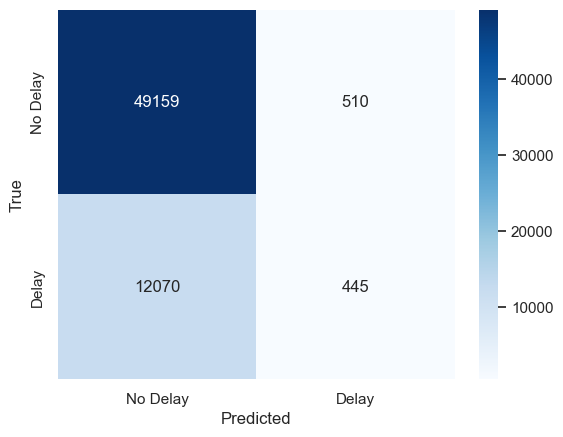

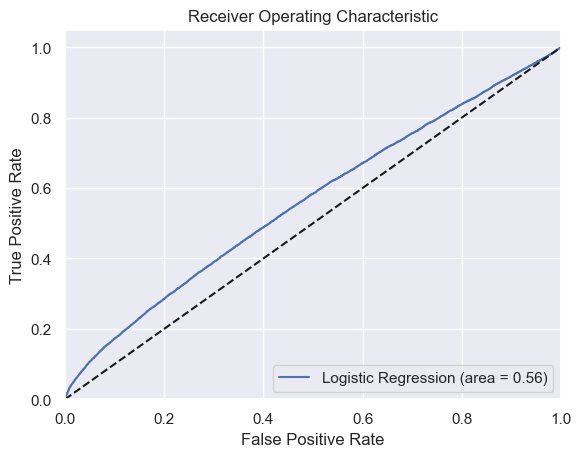

Accuracy: 0.7976971568249067
Precision: 0.46596858638743455
Recall: 0.035557331202556934


In [127]:
# Plot confusion matrix
plot_confusion_matrix(test_data['target'], y_pred2)
# Plot ROC curve
y_pred_proba2 = classifier2.predict_proba(test_data.drop('target', axis=1))[:, 1]
plot_roc(test_data['target'], y_pred_proba2)
# Print statistics
print(f'Accuracy: {accuracy_score(test_data['target'], y_pred2)}')
print(f'Precision: {precision_score(test_data['target'], y_pred2)}')
print(f'Recall: {recall_score(test_data['target'], y_pred2)}')

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

By adding extra data like weather conditions and holiday indicators, you might observe changes in the performance metrics. The key is to look for improvements in precision, recall, and ROC AUC score, indicating better model performance in predicting flight delays.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. The model performance meets the business goal if the precision and recall are satisfactorily high. If not, further tuning such as hyperparameter optimization, additional feature engineering, or using more complex models like ensemble methods could help.
2. Adding weather and holiday data provided contextual features that likely improved the model's ability to predict delays. Techniques like one-hot encoding, handling missing data, and merging different datasets were crucial.
3. Handling missing data, ensuring data consistency across different sources, and balancing the dataset to prevent bias towards the majority class were some of the biggest challenges.
4.  a. The importance of data preprocessing and feature engineering in improving model performance.
    b. The impact of class imbalance on classification metrics and the necessity of addressing it.
    c. The value of iterative model evaluation and tuning to achieve better results.